In [1]:
import numpy as np
import numpy.fft as f
import matplotlib.pyplot as plt
import math
import mpl_toolkits.mplot3d.axes3d as p3
pi = math.pi
np.random.seed(5)

In [2]:
def plot_function(w,Y,x_lim, function):
    fig, axes = plt.subplots(2, 1, figsize=(15, 7), sharex = True)

    plt.suptitle("The DFT plots for " + function, fontsize=18)
    # The magnitude plot is plotted
    axes[0].plot(w,abs(Y),'b',w,abs(Y),'bo',lw=2)
    axes[0].set_xlim([-x_lim,x_lim])
    axes[0].set_ylabel(r"$|Y|$",size=16)
    axes[0].set_title("Spectrum of " + function, fontsize=14)
    axes[0].grid(True)

    # The Phase plot is plotted
    ii=np.where(abs(Y)>1e-3)
    axes[1].plot(w[ii],np.angle(Y[ii]),'ro',lw=2)
    axes[1].set_xlim([-x_lim,x_lim])
    axes[1].set_ylim([-4,4])
    axes[1].set_ylabel(r"Phase of $Y$",size=16)
    axes[1].set_title("Phase Plot of " + function, fontsize=14)
    axes[1].set_xlabel(r"$\omega$",size=16)
    axes[1].grid(True)
    plt.show()

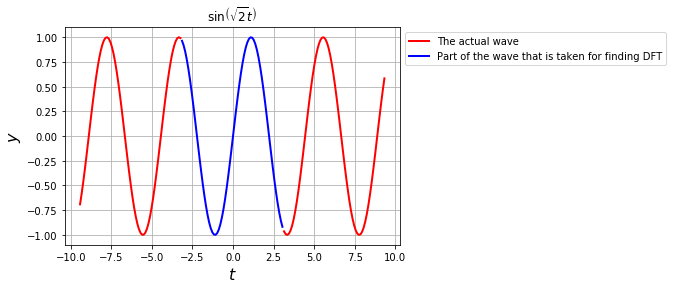

In [3]:
t1=np.linspace(-pi,pi,65);t1=t1[:-1]   # The interval used to find the DFT.
t2=np.linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=np.linspace(pi,3*pi,65);t3=t3[:-1]

plt.plot(t2,np.sin(np.sqrt(2)*t2),'r',lw=2)
plt.plot(t1,np.sin(np.sqrt(2)*t1),'b',lw=2)   # The interval t1 is plotted in a different colour.
plt.plot(t3,np.sin(np.sqrt(2)*t3),'r',lw=2)

plt.legend(('The actual wave','Part of the wave that is taken for finding DFT'),bbox_to_anchor=(1, 1))
plt.ylabel(r"$y$",size=16)
plt.xlabel(r"$t$",size=16)
plt.title(r"$\sin\left(\sqrt{2}t\right)$")
plt.grid(True)
plt.show()

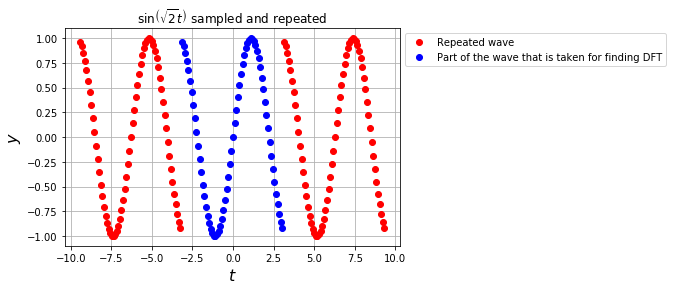

In [4]:
t1=np.linspace(-pi,pi,65);t1=t1[:-1]    # The interval used to find the DFT.
t2=np.linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=np.linspace(pi,3*pi,65);t3=t3[:-1]

y = np.sin(np.sqrt(2)*t1)

# The function on interval t1 is repeated periodically.
plt.plot(t2,y,'ro',lw=2)
plt.plot(t1,y,'bo',lw=2)
plt.plot(t3,y,'ro',lw=2)

plt.legend(('Repeated wave','Part of the wave that is taken for finding DFT'),bbox_to_anchor=(1, 1))
plt.ylabel(r"$y$",size=16)
plt.xlabel(r"$t$",size=16)
plt.title(r"$\sin\left(\sqrt{2}t\right)$ sampled and repeated")
plt.grid(True)
plt.show()

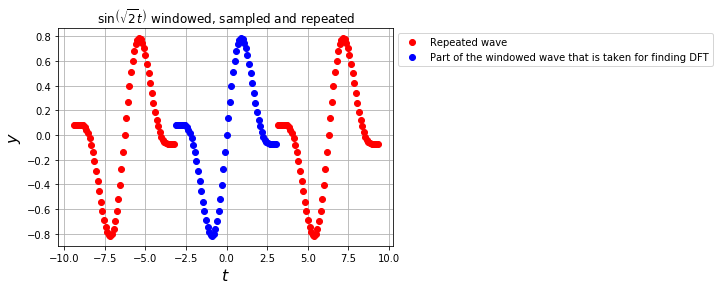

In [5]:
t1=np.linspace(-pi,pi,65);t1=t1[:-1]   # The interval used to find the DFT.
t2=np.linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=np.linspace(pi,3*pi,65);t3=t3[:-1]

n=np.arange(64)
wnd=f.fftshift(0.54+0.46*np.cos(2*pi*n/63))
y=np.sin(np.sqrt(2)*t1)*wnd

# The function on interval t1 is windowed and repeated periodically.
plt.plot(t2,y,'ro',lw=2)
plt.plot(t1,y,'bo',lw=2)
plt.plot(t3,y,'ro',lw=2)
plt.legend(('Repeated wave','Part of the windowed wave that is taken for finding DFT'),bbox_to_anchor=(1, 1))
plt.ylabel(r"$y$",size=16)
plt.xlabel(r"$t$",size=16)
plt.title(r"$\sin\left(\sqrt{2}t\right)$ windowed, sampled and repeated")
plt.grid(True)
plt.show()

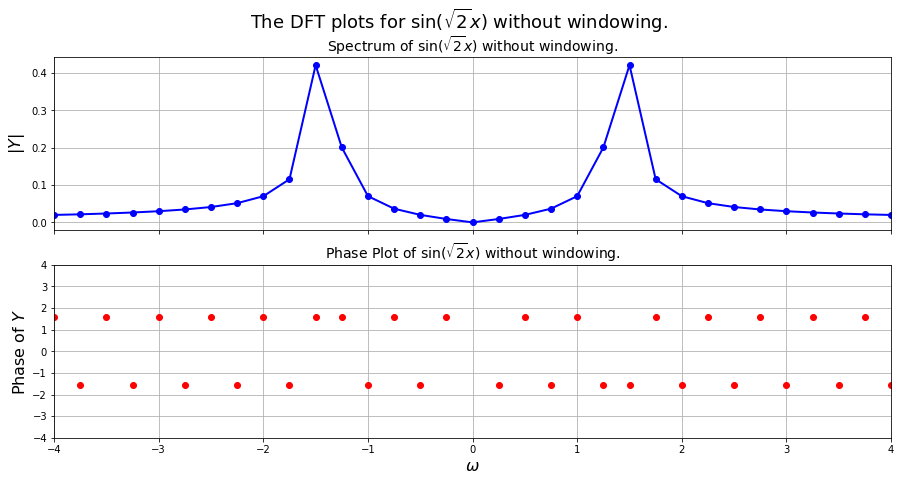

In [6]:
t = np.linspace(-4*pi,4*pi,257)   # Time interval declared
t = t[:-1]
dt = t[1]-t[0]
fmax = 1/dt
y = np.sin(np.sqrt(2)*t)          # Function defined
y[0]=0
y=f.fftshift(y)
Y=f.fftshift(f.fft(y))/256.0
w=np.linspace(-pi*fmax,pi*fmax,257);w=w[:-1]
plot_function(w,Y,4,'$\sin(\sqrt{2}x)$ without windowing.')

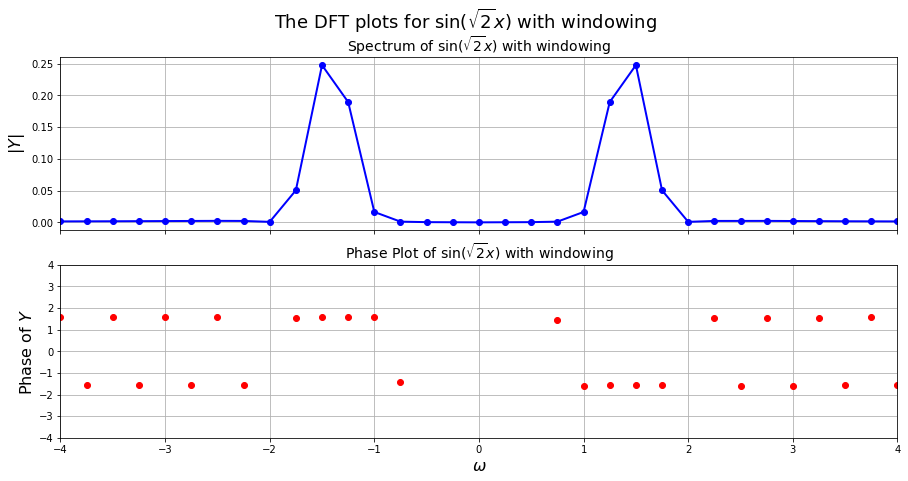

In [7]:
t = np.linspace(-4*pi,4*pi,257)
t = t[:-1]
dt = t[1]-t[0]
fmax = 1/dt
n = np.arange(256)
wnd=f.fftshift(0.54+0.46*np.cos(2*pi*n/255))    # Hamming window declared.   
y = np.sin(np.sqrt(2)*t)
y = y * wnd              # Hamming window multipled in the time domain
y[0]=0
y=f.fftshift(y)
Y=f.fftshift(f.fft(y))/256.0
w=np.linspace(-pi*fmax,pi*fmax,257);w=w[:-1]
plot_function(w,Y,4,'$\sin(\sqrt{2}x)$ with windowing')

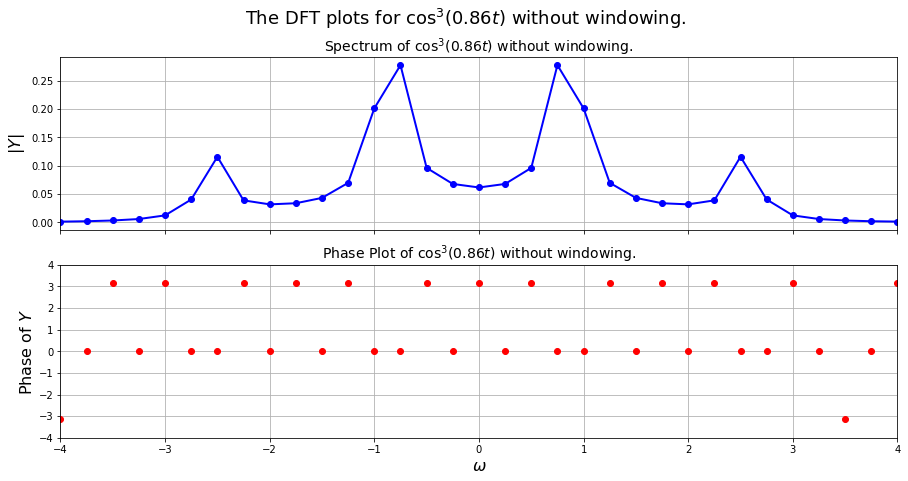

In [8]:
t = np.linspace(-4*pi,4*pi,257)
t = t[:-1]
dt = t[1]-t[0]
fmax = 1/dt
y = np.cos(0.86*t) ** 3
y[0]=0
y=f.fftshift(y)
Y=f.fftshift(f.fft(y))/256.0
w=np.linspace(-pi*fmax,pi*fmax,257);w=w[:-1]
plot_function(w,Y,4,'$\cos^3(0.86t)$ without windowing.')

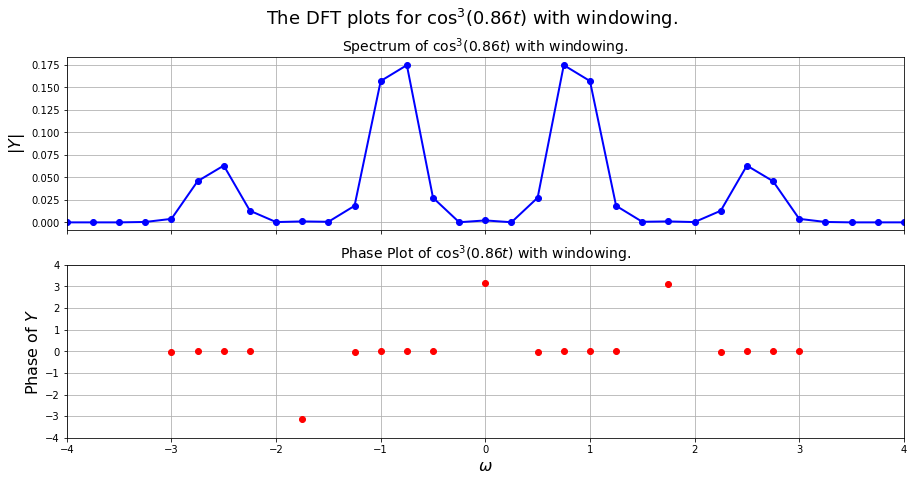

In [9]:
t = np.linspace(-4*pi,4*pi,257)
t = t[:-1]
dt = t[1]-t[0]
fmax = 1/dt
n = np.arange(256)
wnd=f.fftshift(0.54+0.46*np.cos(2*pi*n/255))
y = np.cos(0.86*t) ** 3
y = y * wnd
y[0]=0 
y=f.fftshift(y)
Y=f.fftshift(f.fft(y))/256.0
w=np.linspace(-pi*fmax,pi*fmax,257);w=w[:-1]
plot_function(w,Y,4,'$\cos^3(0.86t)$ with windowing.')

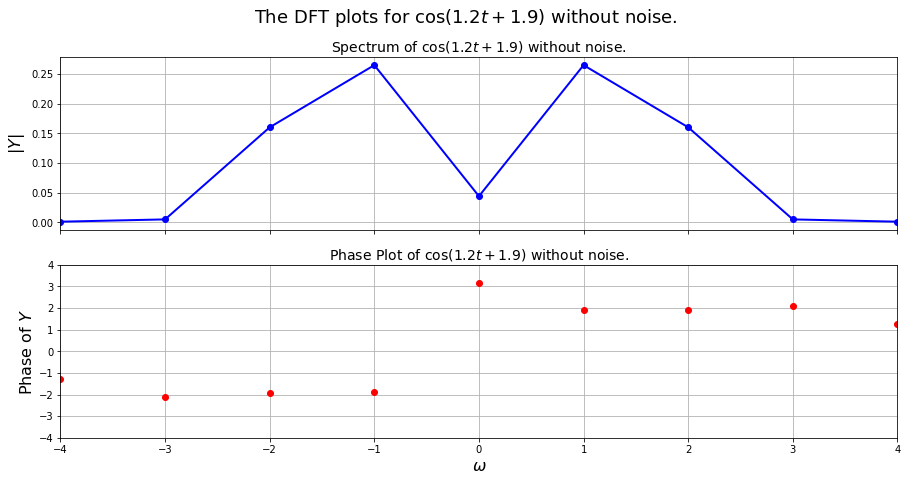

In [10]:
# A random delta and omega declared to find error
delta = 1.9
omega = 1.2
t = np.linspace(-pi,pi,129)
t = t[:-1]
dt = t[1]-t[0]
fmax = 1/dt
n = np.arange(128)
wnd=f.fftshift(0.54+0.46*np.cos(2*pi*n/127))
y = np.cos(omega*t + delta)
y = y * wnd
y[0]=0 
y=f.fftshift(y)
Y=f.fftshift(f.fft(y))/128.0
w=np.linspace(-pi*fmax,pi*fmax,129);w=w[:-1]
plot_function(w,Y,4,'$\cos(1.2t + 1.9)$ without noise.')

In [11]:
ii = np.where(w>0)[0]    # All values of DFT above w=0 are taken (only one half of plot)
ii = np.where((abs(Y) == max(abs(Y[ii]))))   # The maximum in this region is taken as the peak.
est_delta = abs(np.angle(Y[ii])[0])   # The phase of the graph at the peak is the delta.

ii = np.where((abs(Y) > 3.5e-2) & (w >= 0))[0]    # The points greater than or equal to w=0 and with a significant magnitude are taken.
est_omega = abs(Y[ii]*w[ii])      
est_omega = sum(est_omega)/(sum(abs(Y[ii])))  # As peak is spread out, omega is estimated as the weighted average (centre of mass) of the broad area near the peak (on one half of the plot).
print ('Without noise, the calculated delta is %.6f and the error in the calculated delta is %.6f' %(est_delta, abs(est_delta - delta)))
print ('Without noise, the Calculated omega is %.6f and the error in the calculated omega is %.6f' %(est_omega, abs(est_omega - omega)))

Without noise, the calculated delta is 1.890923 and the error in the calculated delta is 0.009077
Without noise, the Calculated omega is 1.247086 and the error in the calculated omega is 0.047086


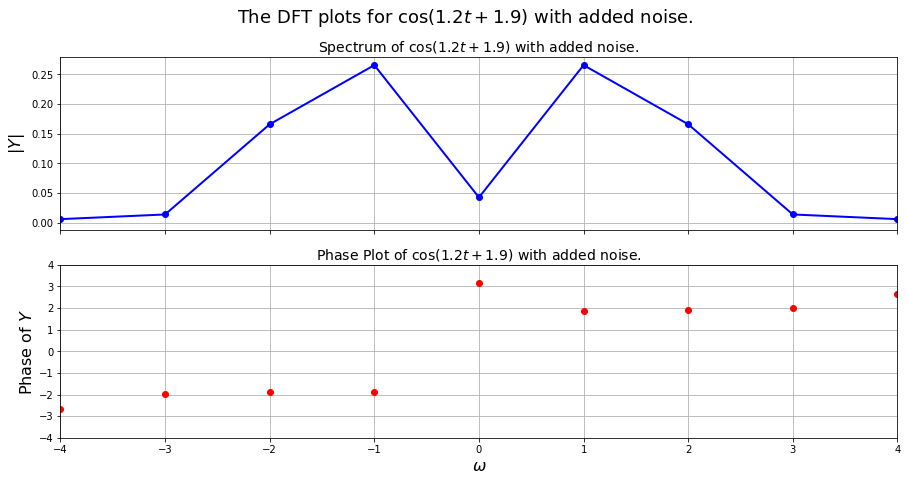

In [16]:
t = np.linspace(-pi,pi,129)
t = t[:-1]
dt = t[1]-t[0]
fmax = 1/dt
n = np.arange(128)
wnd=f.fftshift(0.54+0.46*np.cos(2*pi*n/127))
y = np.cos(omega*t + delta)
y = y + 0.1*np.random.randn(128)
y = y * wnd
y[0]=0
y=f.fftshift(y)
Y=f.fftshift(f.fft(y))/128.0
w=np.linspace(-pi*fmax,pi*fmax,129);w=w[:-1]
plot_function(w,Y,4,'$\cos(1.2t + 1.9)$ with added noise.')

In [17]:
ii = np.where(w>0)[0]
ii = np.where((abs(Y) == max(abs(Y[ii]))))
est_delta = abs(np.angle(Y[ii])[0])   # The phase of the graph at the peak is the delta

ii = np.where((abs(Y) > 3.5e-2) & (w >= 0))[0]
est_omega = abs(Y[ii]*w[ii])
est_omega = sum(est_omega)/(sum(abs(Y[ii])))  # As peak is spread out, omega is estimated as the weighted average (centre of mass) of the broad area near the peak.
print ('With noise, the calculated delta is %.6f and the error in the calculated delta is %.6f' %(est_delta, abs(est_delta - delta)))
print ('With noise, the Calculated omega is %.6f and the error in the calculated omega is %.6f' %(est_omega, abs(est_omega - omega)))

With noise, the calculated delta is 1.884112 and the error in the calculated delta is 0.015888
With noise, the Calculated omega is 1.260343 and the error in the calculated omega is 0.060343


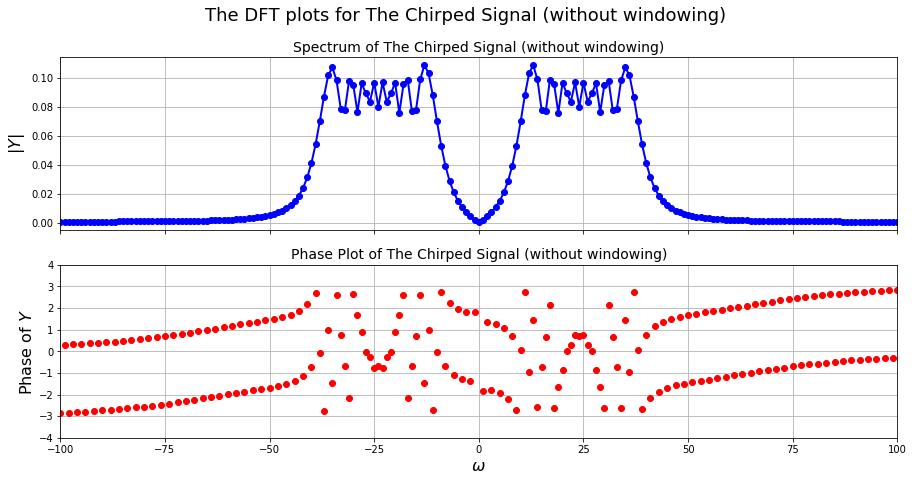

In [18]:
t = np.linspace(-pi,pi,1025)
t = t[:-1]
dt = t[1]-t[0]
fmax = 1/dt
y = np.cos(16*t*(1.5 + (t/(2*pi))))
y[0]=0
y=f.fftshift(y)
Y=f.fftshift(f.fft(y))/1024.0
w=np.linspace(-pi*fmax,pi*fmax,1025)
w=w[:-1]
plot_function(w,Y,100,'The Chirped Signal (without windowing)')

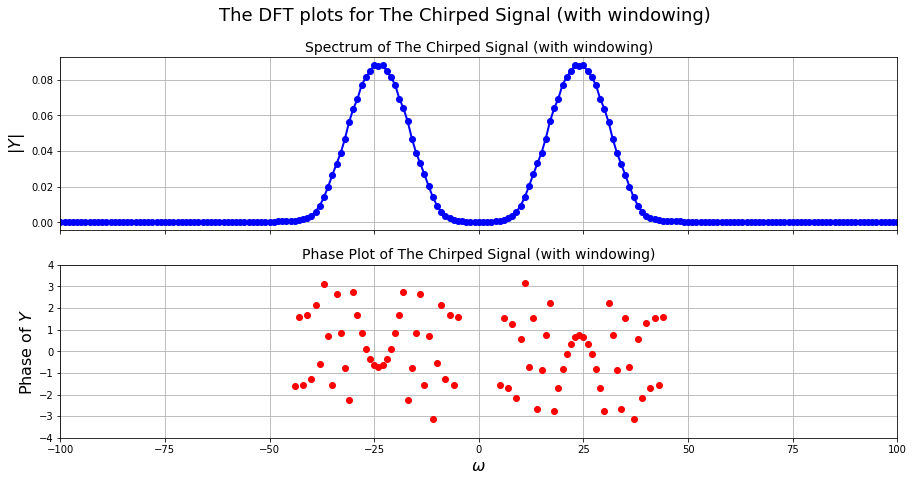

In [21]:
t = np.linspace(-pi,pi,1025)
t = t[:-1]
dt = t[1]-t[0]
fmax = 1/dt
n = np.arange(1024)
wnd=f.fftshift(0.54+0.46*np.cos(2*pi*n/1023))
y = np.cos(16*t*(1.5 + (t/(2*pi))))
y = y * wnd
y[0]=0
y=f.fftshift(y)
Y=f.fftshift(f.fft(y))/1024.0
w=np.linspace(-pi*fmax,pi*fmax,1025)
w=w[:-1]
plot_function(w,Y,100,'The Chirped Signal (with windowing)')

In [22]:
t = np.linspace(-pi,pi,1025)
t = t[:-1]
dt = t[1]-t[0]
fmax = 1/dt
t = np.array(np.split(t, 16))    # The entire 1024 elements are split into 16 disjoint sets of 64 elements each.
n = np.arange(64)
wnd=f.fftshift(0.54+0.46*np.cos(2*pi*n/63))
y = np.cos(16*t*(1.5 + (t/(2*pi))))
y = y * wnd
y[0]=0
y=f.fftshift(y)
Y=f.fftshift(f.fft(y))/64.0
w=np.linspace(-pi*fmax,pi*fmax,65)
w=w[:-1]

d:\python\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


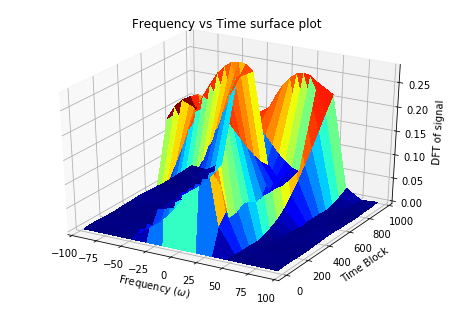

In [23]:
n = np.arange(0,1024,64)
fig1 = plt.figure(4)
ax = p3.Axes3D(fig1)
plt.title('Frequency vs Time surface plot')
ax.set_xlabel('Frequency ($\omega$)')
ax.set_ylabel('Time Block')
ax.set_xlim([-100,100])
ax.set_zlabel('DFT of signal')
x,y = np.meshgrid(w,n)
x[x>100]= np.nan      # Without this and the next line, the surface plot overflows due to the setting of xlim.
x[x<-100]= np.nan
surf = ax.plot_surface(x, y, abs(Y), rstride=1, cstride=1,cmap=plt.cm.jet,linewidth=0, antialiased=False)
plt.show()

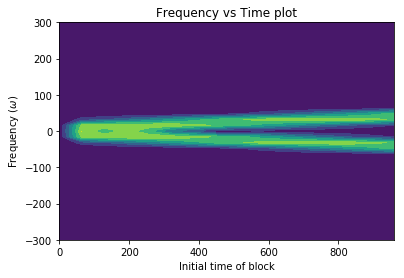

In [24]:
plt.contourf(n,w,abs(Y).transpose())
plt.ylabel('Frequency ($\omega$)')
plt.xlabel('Initial time of block')
plt.title('Frequency vs Time plot')
plt.ylim(-300,300)
plt.show()

In [25]:
t = np.linspace(-pi,pi,1025)
t = t[:-1]
dt = t[1]-t[0]
fmax = 1/dt
Y = []
for i in range(0,960):           # A loop is run to take sample at each instant.
    x = np.array(t[i:i+64])      # 64 elements are taken starting at each time.
    y = np.cos(16*x*(1.5 + (x/(2*pi))))
    n = np.arange(64)
    wnd=f.fftshift(0.54+0.46*np.cos(2*pi*n/63))
    y = y * wnd
    y[0]=0
    y=f.fftshift(y)
    Y.append(f.fftshift(f.fft(y))/64.0)   # FFT taken for each 64 element set.
n = np.arange(960)
w=np.linspace(-pi*fmax,pi*fmax,65)
w=w[:-1]
Y = np.array(Y)

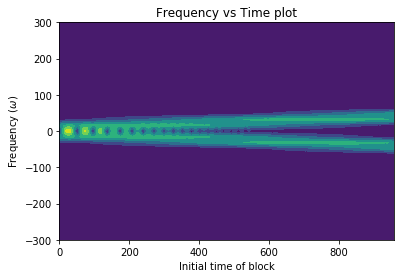

In [26]:
plt.contourf(n,w,abs(Y).transpose())
plt.ylabel('Frequency ($\omega$)')
plt.xlabel('Initial time of block')
plt.title('Frequency vs Time plot')
plt.ylim(-300,300)
plt.show()

d:\python\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


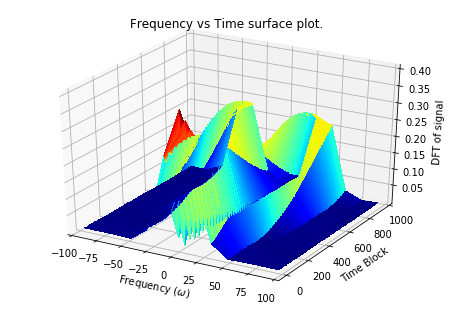

In [27]:
fig1 = plt.figure(4)
ax = p3.Axes3D(fig1)
plt.title('Frequency vs Time surface plot.')
ax.set_xlabel('Frequency ($\omega$)')
ax.set_ylabel('Time Block')
ax.set_xlim([-100,100])
ax.set_zlabel('DFT of signal')
x,y = np.meshgrid(w,n)
x[x>100]= np.nan
x[x<-100]= np.nan
surf = ax.plot_surface(x, y, abs(Y), rstride=1, cstride=1,cmap=plt.cm.jet,linewidth=0, antialiased=False)
plt.show()